# Feature Selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## Separability and Scatter matrix
Separability is commonly measured with a scatter matrix.

Scatter matrix = $\sum[(\mu-x_k)(\mu-x_k)^T]$.  
Scatter matrix = outer product (u-x) * (u-x).  
For d dimensional data, scatter matrix size is (d x d).   

More generally, use E(x) = Expectation of x instead of $\mu$.
Use the mean, $\mu$, for the maximum likelihood estimate (MLE).
For maximum likelihood, assum the latent distributions are normal.
Then, (scatter matrix)/n is the MLE of the covariance matrix. 
It is also the maximum a priori (MAP) estimate if the priors are uniform.
The statistic is biased due to n in the denominator;
the statistic is unbiased if we use n-1 in the denominator.

Note similarity to covariation matrix.  
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Matrix M is positive definite if $z^TMz$ is positive for all real column vectors z.  
Matrix M is positive semi-definite if $z^TMz$ is non-negative for all real column vectors z.  
The scatter matrix is positive semi-definite.   

See wikipedia [scatter matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

In [2]:
def scatter_matrix(X):
    """For 100 points in 2D space, X has size=(100,2)"""
    instances = X.shape[0]
    features = X.shape[1]
    means = np.mean(X,axis=0)  # vector of feature means
    sm = np.zeros( (features,features) )
    for i in range(instances):
        deviation = means-X[i] # vector of feature deviations
        outer_product = np.outer(deviation,deviation)
        sm += outer_product
    return sm

In [3]:
# Generate one hundred uniformly scattered points.
# All points come from the same distribution.
# All x coords are uniform 0 to 50.
# All y coords are uniform 0 to 100.
N = 100
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 100, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
print('Data shape')
print(xy.shape)
print('First two rows of data, with columns x and y:')
print(xy[0])
print(xy[1])
print('Mean of x, mean of y')
means = np.mean(xy,axis=0)  # vector of feature means
print(means)
print('First iteration of the summation')
deviation = means-xy[0] # vector of feature deviations
outer_product = np.outer(deviation,deviation)
print("deviation = mean-row0\n",deviation)
print("scatter = outer-product(dev-col-vec,dev-row-vec)\n",outer_product)
sm = scatter_matrix(xy)
print('Total scatter matrix')
print(sm)
mlcov = sm/N
print('MLE of Covariance matrix - biased (divide by N)')
print(mlcov)
print('Numpy computation of the same thing')
# Numpy cov() expects rows of features, columns of values
print(np.cov(np.transpose(xy), bias=True))

Data shape
(100, 2)
First two rows of data, with columns x and y:
[29 13]
[12 32]
Mean of x, mean of y
[25.71 49.23]
First iteration of the summation
deviation = mean-row0
 [-3.29 36.23]
scatter = outer-product(dev-col-vec,dev-row-vec)
 [[  10.8241 -119.1967]
 [-119.1967 1312.6129]]
Total scatter matrix
[[21258.59  3445.67]
 [ 3445.67 76455.71]]
MLE of Covariance matrix - biased (divide by N)
[[212.5859  34.4567]
 [ 34.4567 764.5571]]
Numpy computation of the same thing
[[212.5859  34.4567]
 [ 34.4567 764.5571]]


Scatter within one group


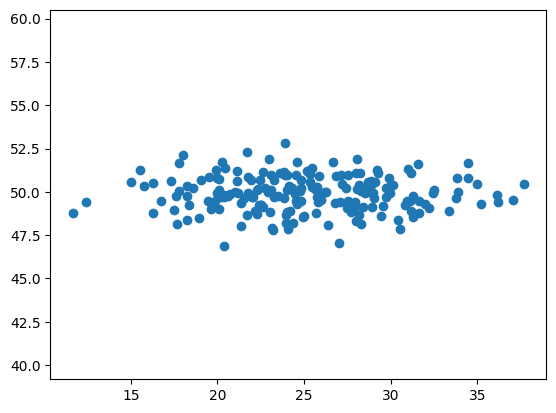

In [12]:
print('Scatter within one group')
plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

In [13]:
# Generate two hundred uniformly scattered points.
# All points come from the same distribution.
# All x coords are Gaussian (25,5).
# All y coords are Gaussian (50,1).
N = 200
mu_x = 25
mu_y = 50
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu_x, sigma_x, N)
y = np.random.normal(mu_y, sigma_y, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
print(np.cov(np.transpose(xy), bias=True))

Scatter matrix
[[4841.67433475   72.14754405]
 [  72.14754405  197.79831987]]
ML estimate of Covariance matrix
[[24.20837167  0.36073772]
 [ 0.36073772  0.9889916 ]]
Numpy estimate of Covariance matrix
[[24.20837167  0.36073772]
 [ 0.36073772  0.9889916 ]]


Scatter within one group


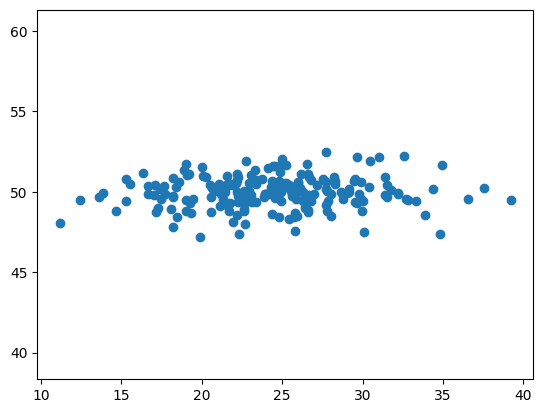

In [14]:
print('Scatter within one group')
plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

# Feature Selection
Too many features is a problem due to

* NumFeatures > NumInstances
* Curse of dimensionality
* Worse-than-linear algorithm complexity
* Model confusion from irrelevent features
* Overfitting to variance in irrelevant features

After FEATURE EXTRACTION,   
we need to reduce complexity by  
FEATURE SELECTION or DIMENSIONALITY REDUCTION.

But finding the optimal subset is NP-hard.
Also, cannot just use features with high correlation (predictive value)
due to important feature-interaction effects. 
So there are heuristics and domain-specific rules.
* Which features can we do without? 
* Which features can we ignore? 

## Separability
We define separability as a scalar quantity and try to maximize it. 
Here are commonly used definitions of separability.   
All these rely on between-group scatter / within-group scatter.

* $J = tr(S_B)/tr(S_W)$
* $J = tr(S_W^{-1}S_B)$
* $J = det(S_W^{-1}S_B)$
* $J = ln[det(S_W^{-1}S_B)]$

Separability over all features sets the upper limit on the learning accuracy.  
Max-Min problem: maximally reduce features while minimally reducing separability.

## Correlation
Find features that are highly correlated to the lables.

Pearson's correlation between feature f and class y   
$R = \frac {cov(f,y)} {\sqrt{var(f)var(y)}}$   
$R = \frac {\sum[(f-\bar{f})(y-\bar{y})]} {\sqrt{\sum[(f-\bar{f})^2\sum(y-\bar{y})^2]}}$ 
Usually use $|R|$ or $R^2$.  

Problem: Correlation only detects linear relationships.  
Important features may be predictive of class collectively 
but uncorrelated to class individually.

## Mutual Information
Find a feature subset that conveys the same information 
as the labels. 

Compared to correlation, 
mutual information detects non-linear relationships,
but is harder to compute.

Information:  
$I(x) = p(x) ln(p(x))$  

Mutual information between feature xi and class y,
uses the joint probability divided by the marginal probabilities:  
$I(x_i,y) = p(x_i,y) ln[p(x_i,y)/p(x_i)p(y)]$

With discrete variables, 
and using frequencies as empirical estimates of probabilities:  
$I(X,Y) = \sum_x \sum_y P(X=x,Y=y) ln[P(X=x,Y=y)/P(X=x)P(Y=y)]$

## Filter vs Wrapper methods
Empirically, try classification while leaving out some features.

### Filter methods
These are independent of any model. 
Also called unsupervised.
May not be optimal for a chosen model. 

Examples: 
Choose features that improve clustering and reduce outliers.
Ignore some features that correlate with other features.
Choose features that correlate with the label (supervised).

### Wrapper methods
These are specific to a model. 
Also called supervised. 
Test goodness by cross-validation using the model of interest.

Methods for feature selection with a wrapper 
* Forward selection ... start with one and iteratively add more.   
* Reverse selection ... start with full set and iteratively remove some. 
* Bidirectional selection ... after adding a good one, check if others could be removed.

Note these are greedy and compute-intense.